# TODO

- process framing ('comment_over_communicatie') moet eruit, dit is gewoon verkeerd gecodeerd


# Analysis for Climate Discourse paper

This notebook contains the analysis for the 'substantive' paper

In [1]:
import pandas as pd
import statsmodels.formula.api as smd
import numpy as np
import statsmodels.formula.api as smf

# Dataset overview and datawrangling

In [2]:
df = pd.read_csv('../data/annotations/twitter_klimaat_discussie_coderingen.csv')

In [3]:
df

,coder,jobset,scientific_consensus.pro_klimaat,scientific_consensus.belangrijk_onderwerp,scientific_consensus.sterke_mening,scientific_consensus.interesse_klimaat,age,gender,education,workhours,tweet_id,tweet_pro_klimaat,comment_nr,comment_pro_klimaat,comment_inhoudelijk_argument,comment_persoonlijke_aanval,comment_over_communicatie,comment_respectvol,id
0,11,set_3,3.0,4.0,5.0,5.0,30.0,Vrouw,Voorbereidend of kort middelbaar beroepsonderw...,Tussen de 10 en 20 uur,22,Ja,1,Ja,Inhoudelijk argument,Persoonlijke aanval,Oneens,Oneens,11_22_1
1,11,set_3,3.0,4.0,5.0,5.0,30.0,Vrouw,Voorbereidend of kort middelbaar beroepsonderw...,Tussen de 10 en 20 uur,22,Ja,2,Ja,Inhoudelijk argument,Persoonlijke aanval,Eens,Oneens,11_22_2
2,11,set_3,3.0,4.0,5.0,5.0,30.0,Vrouw,Voorbereidend of kort middelbaar beroepsonderw...,Tussen de 10 en 20 uur,22,Ja,3,Ja,Geen inhoudelijk argument,Geen persoonlijke aanval,Eens,Oneens,11_22_3
3,11,set_3,3.0,4.0,5.0,5.0,30.0,Vrouw,Voorbereidend of kort middelbaar beroepsonderw...,Tussen de 10 en 20 uur,22,Ja,4,Neutraal,Inhoudelijk argument,Persoonlijke aanval,Eens,Eens,11_22_4
4,11,set_3,3.0,4.0,5.0,5.0,30.0,Vrouw,Voorbereidend of kort middelbaar beroepsonderw...,Tussen de 10 en 20 uur,22,Ja,5,Neutraal,Inhoudelijk argument,Geen persoonlijke aanval,Oneens,Eens,11_22_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42839,2588,set_44,6.0,7.0,6.0,6.0,22.0,Vrouw,"Hoger beroepsonderwijs (HBO, HTS, HEAO, Social...",Tussen de 30 en 40 uur,378,Ja,1,Nee,Geen inhoudelijk argument,Geen persoonlijke aanval,Oneens,Oneens,2588_378_1
42840,2588,set_44,6.0,7.0,6.0,6.0,22.0,Vrouw,"Hoger beroepsonderwijs (HBO, HTS, HEAO, Social...",Tussen de 30 en 40 uur,378,Ja,2,Nee,Geen inhoudelijk argument,Geen persoonlijke aanval,Oneens,Oneens,2588_378_2
42841,2588,set_44,6.0,7.0,6.0,6.0,22.0,Vrouw,"Hoger beroepsonderwijs (HBO, HTS, HEAO, Social...",Tussen de 30 en 40 uur,378,Ja,3,Nee,Geen inhoudelijk argument,Geen persoonlijke aanval,Oneens,Oneens,2588_378_3
42842,2588,set_44,6.0,7.0,6.0,6.0,22.0,Vrouw,"Hoger beroepsonderwijs (HBO, HTS, HEAO, Social...",Tussen de 30 en 40 uur,378,Ja,4,Nee,Geen inhoudelijk argument,Geen persoonlijke aanval,Oneens,Oneens,2588_378_4


In [4]:
# for this paper, we ignore the annotator characteritics for now - they need to be analyzed in the bias paper.
df2 = df[['coder', 'tweet_id', 'comment_nr',
   'comment_pro_klimaat',
    'comment_inhoudelijk_argument',
    'comment_persoonlijke_aanval',
    'comment_over_communicatie',
    'comment_respectvol']]
df2

,coder,tweet_id,comment_nr,comment_pro_klimaat,comment_inhoudelijk_argument,comment_persoonlijke_aanval,comment_over_communicatie,comment_respectvol
0,11,22,1,Ja,Inhoudelijk argument,Persoonlijke aanval,Oneens,Oneens
1,11,22,2,Ja,Inhoudelijk argument,Persoonlijke aanval,Eens,Oneens
2,11,22,3,Ja,Geen inhoudelijk argument,Geen persoonlijke aanval,Eens,Oneens
3,11,22,4,Neutraal,Inhoudelijk argument,Persoonlijke aanval,Eens,Eens
4,11,22,5,Neutraal,Inhoudelijk argument,Geen persoonlijke aanval,Oneens,Eens
...,...,...,...,...,...,...,...,...
42839,2588,378,1,Nee,Geen inhoudelijk argument,Geen persoonlijke aanval,Oneens,Oneens
42840,2588,378,2,Nee,Geen inhoudelijk argument,Geen persoonlijke aanval,Oneens,Oneens
42841,2588,378,3,Nee,Geen inhoudelijk argument,Geen persoonlijke aanval,Oneens,Oneens
42842,2588,378,4,Nee,Geen inhoudelijk argument,Geen persoonlijke aanval,Oneens,Oneens


In [5]:
# merge in tweet texts
tweets = pd.read_csv('../retrieve-tweets/klimaatgesprekken-eerste-mag-geen-at-bevatten-clean.csv')
tweets = tweets.rename({'conversationid':"tweet_id", 'tweetorder':'comment_nr'}, axis=1)
df2 = df2.merge(tweets, on=['tweet_id', 'comment_nr'], how='left')

In [6]:
tweets

,tweet_id,comment_nr,text
0,1,0,Op basis van #CBS onderzoek blijkt dar 96 % va...
1,1,1,@USER @USER @USER @USER Ja het wordt steeds ko...
2,1,2,@USER @USER @USER @USER Omdat het steeds warme...
3,1,3,@USER @USER @USER @USER Nou ik kan me niet her...
4,1,4,@USER @USER @USER @USER Ik zou het huis maar e...
...,...,...,...
2030,595,1,@USER https://t.co/wsq6qzESjV
2031,595,2,@USER 🙄
2032,595,3,@USER Triest hè. Maar goed een ouwe witte man.
2033,595,4,@USER Supertriest. En ik ben te dom om dat te ...


In [7]:
# hoe veel annotaties per gesprek?
# in paper
df2.groupby(['tweet_id','coder']).first().reset_index()[['tweet_id','coder']].groupby('tweet_id').agg(len).describe()

,coder
count,349.000000
mean,21.432665
std,2.893546
min,15.000000
25%,20.000000
50%,21.000000
75%,23.000000
max,48.000000


## Flatten dataframe
We have multiple codings per comment - this will be analyzed in the bias paper.
For now, we proceed by taking the majority vote without further analysis

In [8]:
def aggcoders(series):
    '''takes mean if numeric, otherwise majority vote'''
    try:
        return series.mean()
    except:
        r = series.mode()
        return r
    
def tiebreak(cell):
    # we're conservative - if in doubt, we say not present. No > neutral > yes
    # superlelijke implementatie maar goed
    if pd.api.types.is_list_like(cell):
        for e in cell:
            if 'geen' or 'oneens' in e.lower():
                return e
        # if that didn't work, check for neutral
        for e in cell:
            if 'neutral' in e.lower():
                return e
        return
    else:
        return cell

In [9]:
# majority vote w/tiebreak
# TODO: maybe find better way once coder bias is analyzed
dfagg = df2.groupby(['tweet_id','comment_nr']).agg(aggcoders).reset_index().applymap(tiebreak)
dfagg

,tweet_id,comment_nr,coder,comment_pro_klimaat,comment_inhoudelijk_argument,comment_persoonlijke_aanval,comment_over_communicatie,comment_respectvol,text
0,1,1,1252.083333,Neutraal,Geen inhoudelijk argument,Geen persoonlijke aanval,Eens,Eens,@USER @USER @USER @USER Ja het wordt steeds ko...
1,1,2,1252.083333,Ja,Inhoudelijk argument,Geen persoonlijke aanval,Eens,Eens,@USER @USER @USER @USER Omdat het steeds warme...
2,1,3,1252.083333,Nee,Geen inhoudelijk argument,Geen persoonlijke aanval,Eens,Eens,@USER @USER @USER @USER Nou ik kan me niet her...
3,1,4,1252.083333,Ja,Inhoudelijk argument,Persoonlijke aanval,Eens,Eens,@USER @USER @USER @USER Ik zou het huis maar e...
4,1,5,1252.083333,Nee,Geen inhoudelijk argument,Persoonlijke aanval,Eens,Oneens,@USER @USER @USER @USER Ja jij zat vast op Ibiza.
...,...,...,...,...,...,...,...,...,...
1999,595,1,1161.380952,Nee,Geen inhoudelijk argument,Geen persoonlijke aanval,Oneens,Eens,@USER https://t.co/wsq6qzESjV
2000,595,2,1161.380952,Neutraal,Geen inhoudelijk argument,Geen persoonlijke aanval,Eens,Oneens,@USER 🙄
2001,595,3,1161.380952,Nee,Geen inhoudelijk argument,Persoonlijke aanval,Eens,Oneens,@USER Triest hè. Maar goed een ouwe witte man.
2002,595,4,1161.380952,Nee,Geen inhoudelijk argument,Persoonlijke aanval,Eens,Oneens,@USER Supertriest. En ik ben te dom om dat te ...


In [10]:
dfagg['comment_inhoudelijk_argument'].value_counts()

comment_inhoudelijk_argument
Geen inhoudelijk argument    1053
Inhoudelijk argument          951
Name: count, dtype: int64

In [11]:
# let's make a binary recode
def customrecode(x):
    if 'geen' in x.lower():
        return False
    elif 'oneens' in x.lower():
        return False
    else:
        return True
dfagg.iloc[:,4:-1] = dfagg.iloc[:,4:-1].applymap(customrecode)

## Diagnostics - slaan de coderingen ergens op?

In [12]:
for e in dfagg.query('comment_over_communicatie==True')['text']:
    print(e)

@USER @USER @USER @USER Ja het wordt steeds kouder.
Hoe kan dat?
@USER @USER @USER @USER Omdat het steeds warmer wordt!
@USER @USER @USER @USER Nou ik kan me niet herinneren dat ik ooit in augustus kachel aan had, dan nu
@USER @USER @USER @USER Ik zou het huis maar eens isoleren en deuren dicht! Ik woon veelal in Nederland, onze verwarming brandt niet!
@USER @USER @USER @USER Ja jij zat vast op Ibiza.
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
@USER Écht Michel? Dus als die natuur - inderdaad door andere oorzaken - al in zeer slechte staat verkeert, dan moet je die niet ontzien en gewoon verder aantasten? Want die molens moeten per se op die 15% van ons landoppervlak in plaats van elders?
@USER Elders kan niet. Zee is al vol. Dus: ja. Dat ontkennen is jezelf voor de gek houden. Er is geen keuze.
@USER Dus de zee en de natuur zijn de plekken waar de opwek plaats moet vinden voor de onverminderd exorbitante energievraag van de industrie/economie/huishoudens. Nou, gelukkig denkt 

In [13]:
for e in dfagg[dfagg['comment_inhoudelijk_argument']==True]['text']:
    print(e)
    print()

@USER @USER @USER @USER Omdat het steeds warmer wordt!

@USER @USER @USER @USER Ik zou het huis maar eens isoleren en deuren dicht! Ik woon veelal in Nederland, onze verwarming brandt niet!

nan

nan

nan

nan

nan

@USER Écht Michel? Dus als die natuur - inderdaad door andere oorzaken - al in zeer slechte staat verkeert, dan moet je die niet ontzien en gewoon verder aantasten? Want die molens moeten per se op die 15% van ons landoppervlak in plaats van elders?

@USER Elders kan niet. Zee is al vol. Dus: ja. Dat ontkennen is jezelf voor de gek houden. Er is geen keuze.

@USER Dus de zee en de natuur zijn de plekken waar de opwek plaats moet vinden voor de onverminderd exorbitante energievraag van de industrie/economie/huishoudens. Nou, gelukkig denkt niet iedereen er zo over.

@USER We je feiten weten voor je uitspraken doet. 1: Ik heb niet gezegd dat er geen energie bezuinigd moet worden. Dat moet wel, ongeveer 50%. Maar dan nog is de opgave gigantisch en is er op zee geen ruimte voor

In [14]:
dfagg['comment_persoonlijke_aanval'].value_counts(normalize=True)
dfagg['comment_persoonlijke_aanval'].value_counts(normalize=False)

comment_persoonlijke_aanval
False    1544
True      460
Name: count, dtype: int64

In [15]:
for e in dfagg[dfagg['comment_persoonlijke_aanval']==True]['text']:
    print(e)
    print()

@USER @USER @USER @USER Ik zou het huis maar eens isoleren en deuren dicht! Ik woon veelal in Nederland, onze verwarming brandt niet!

@USER @USER @USER @USER Ja jij zat vast op Ibiza.

nan

nan

nan

nan

nan

nan

nan

@USER Écht Michel? Dus als die natuur - inderdaad door andere oorzaken - al in zeer slechte staat verkeert, dan moet je die niet ontzien en gewoon verder aantasten? Want die molens moeten per se op die 15% van ons landoppervlak in plaats van elders?

@USER Dus de zee en de natuur zijn de plekken waar de opwek plaats moet vinden voor de onverminderd exorbitante energievraag van de industrie/economie/huishoudens. Nou, gelukkig denkt niet iedereen er zo over.

@USER 2: Ik heb niet gezegd dat er persé opwek in natuur plaats moet vinden. Wel dat voorbarige protest van natuurorganisaties teken is dat zij prioriteiten verkeerd hebben. Door alleen te kijken naar korte termijn belang van bedreigde natuur zien ze niet de vloedgolf die er aan komt.

@USER Als jullie nog banen zoe

In [16]:
dfagg['comment_respectvol'].value_counts(normalize=True)
dfagg['comment_respectvol'].value_counts(normalize=False)

comment_respectvol
True     1676
False     328
Name: count, dtype: int64

In [17]:
for e in dfagg[dfagg['comment_respectvol']==False]['text']:
    print(e)
    print()

@USER @USER @USER @USER Ja jij zat vast op Ibiza.

nan

nan

nan

nan

nan

nan

nan

@USER Als jullie nog banen zoeken. Er ligt nog een berg kerstboom afval en een stuk gereden stoep bij mij om de hoek( Volendamlaan)Doe daar eerst wat aan

nan

nan

@USER Hij praat trouwens onzin want ik heb hier tig mezen in de tuin, er komt trouwens net een merel buurten.

@USER Ohjee...als de capslock's van stal worden worden gehaald, dan weten we dat het menens is...

@USER Wat is de boodschap, je hebt moeite met slikken? Wat heeft dat nou weer met klimaatverandering te maken?

@USER Wat heeft jou opmerking m.b.t. "caps" met  klimaatverandering te maken?

#klimaatzaak #Klimaatzaakshell #klimaatGEKTE

@USER Enig spoor van argumentatie ontbreekt volledig in jou tweet over #klimaatGEKTE . Dat past in een lange traditie van randdebielen op het internet die denken dat ze met capslock hun standpunt kracht bij te zetten. Terwijl ze gewoon geen idee hebben van wat er speelt.

@USER #klimaatGEK(TE) https:/

In [18]:
for e in dfagg.query('comment_respectvol==False and comment_persoonlijke_aanval==True')['text']:
    print(e)
    print()

@USER @USER @USER @USER Ja jij zat vast op Ibiza.

nan

nan

nan

nan

nan

nan

nan

@USER Als jullie nog banen zoeken. Er ligt nog een berg kerstboom afval en een stuk gereden stoep bij mij om de hoek( Volendamlaan)Doe daar eerst wat aan

nan

@USER Hij praat trouwens onzin want ik heb hier tig mezen in de tuin, er komt trouwens net een merel buurten.

@USER Ohjee...als de capslock's van stal worden worden gehaald, dan weten we dat het menens is...

@USER Wat is de boodschap, je hebt moeite met slikken? Wat heeft dat nou weer met klimaatverandering te maken?

@USER Wat heeft jou opmerking m.b.t. "caps" met  klimaatverandering te maken?

#klimaatzaak #Klimaatzaakshell #klimaatGEKTE

@USER Enig spoor van argumentatie ontbreekt volledig in jou tweet over #klimaatGEKTE . Dat past in een lange traditie van randdebielen op het internet die denken dat ze met capslock hun standpunt kracht bij te zetten. Terwijl ze gewoon geen idee hebben van wat er speelt.

nan

nan

nan

@USER Je wilt luiev

In [19]:
dfagg.query('comment_respectvol==False and comment_persoonlijke_aanval==True')['text']

4       @USER @USER @USER @USER Ja jij zat vast op Ibiza.
10                                                    NaN
11                                                    NaN
13                                                    NaN
14                                                    NaN
                              ...                        
1993                                              @USER 😂
1994    @USER Ook als je denkt dat de klimaatopwarming...
2001       @USER Triest hè. Maar goed een ouwe witte man.
2002    @USER Supertriest. En ik ben te dom om dat te ...
2003             @USER Ach de man mag stukkies schrijven.
Name: text, Length: 260, dtype: object

In [20]:
dfagg.query('comment_persoonlijke_aanval==True')['text']

3       @USER @USER @USER @USER Ik zou het huis maar e...
4       @USER @USER @USER @USER Ja jij zat vast op Ibiza.
10                                                    NaN
11                                                    NaN
13                                                    NaN
                              ...                        
1993                                              @USER 😂
1994    @USER Ook als je denkt dat de klimaatopwarming...
2001       @USER Triest hè. Maar goed een ouwe witte man.
2002    @USER Supertriest. En ik ben te dom om dat te ...
2003             @USER Ach de man mag stukkies schrijven.
Name: text, Length: 460, dtype: object

In [21]:
dfagg.query('comment_respectvol==True and comment_persoonlijke_aanval==True')['text']

3       @USER @USER @USER @USER Ik zou het huis maar e...
18      @USER Écht Michel? Dus als die natuur - inderd...
20      @USER Dus de zee en de natuur zijn de plekken ...
22      @USER 2: Ik heb niet gezegd dat er persé opwek...
36      @USER Nee John. Er is wel degelijk een klimaat...
                              ...                        
1943                                                  NaN
1948    @USER Er is inderdaad zoveel nep en vals in de...
1960                                                  NaN
1983                                                  NaN
1989                                  @USER Je bent mild😁
Name: text, Length: 200, dtype: object

# Stap 1: Descriptives

In [24]:
dvs = ['comment_pro_klimaat', 'comment_inhoudelijk_argument',
       'comment_persoonlijke_aanval', 'comment_over_communicatie', 'comment_respectvol']

for dv in dvs:
    print(df[dv].value_counts(normalize=True))
    print()

comment_pro_klimaat
Nee         0.356013
Ja          0.351554
Neutraal    0.292433
Name: proportion, dtype: float64

comment_inhoudelijk_argument
Geen inhoudelijk argument    0.50014
Inhoudelijk argument         0.49986
Name: proportion, dtype: float64

comment_persoonlijke_aanval
Geen persoonlijke aanval    0.628466
Persoonlijke aanval         0.371534
Name: proportion, dtype: float64

comment_over_communicatie
Eens      0.540379
Oneens    0.459621
Name: proportion, dtype: float64

comment_respectvol
Eens      0.686874
Oneens    0.313126
Name: proportion, dtype: float64



In [25]:
df[df.comment_over_communicatie=='Eens']

,coder,jobset,scientific_consensus.pro_klimaat,scientific_consensus.belangrijk_onderwerp,scientific_consensus.sterke_mening,scientific_consensus.interesse_klimaat,age,gender,education,workhours,tweet_id,tweet_pro_klimaat,comment_nr,comment_pro_klimaat,comment_inhoudelijk_argument,comment_persoonlijke_aanval,comment_over_communicatie,comment_respectvol,id
1,11,set_3,3.0,4.0,5.0,5.0,30.0,Vrouw,Voorbereidend of kort middelbaar beroepsonderw...,Tussen de 10 en 20 uur,22,Ja,2,Ja,Inhoudelijk argument,Persoonlijke aanval,Eens,Oneens,11_22_2
2,11,set_3,3.0,4.0,5.0,5.0,30.0,Vrouw,Voorbereidend of kort middelbaar beroepsonderw...,Tussen de 10 en 20 uur,22,Ja,3,Ja,Geen inhoudelijk argument,Geen persoonlijke aanval,Eens,Oneens,11_22_3
3,11,set_3,3.0,4.0,5.0,5.0,30.0,Vrouw,Voorbereidend of kort middelbaar beroepsonderw...,Tussen de 10 en 20 uur,22,Ja,4,Neutraal,Inhoudelijk argument,Persoonlijke aanval,Eens,Eens,11_22_4
6,11,set_3,3.0,4.0,5.0,5.0,30.0,Vrouw,Voorbereidend of kort middelbaar beroepsonderw...,Tussen de 10 en 20 uur,24,Ja,2,Nee,Inhoudelijk argument,Geen persoonlijke aanval,Eens,Oneens,11_24_2
7,11,set_3,3.0,4.0,5.0,5.0,30.0,Vrouw,Voorbereidend of kort middelbaar beroepsonderw...,Tussen de 10 en 20 uur,24,Ja,3,Neutraal,Inhoudelijk argument,Persoonlijke aanval,Eens,Oneens,11_24_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42777,2586,set_42,5.0,6.0,2.0,5.0,17.0,Vrouw,"Hoger beroepsonderwijs (HBO, HTS, HEAO, Social...",Tussen de 5 en 10 uur,360,Neutraal,5,Ja,Geen inhoudelijk argument,Persoonlijke aanval,Eens,Oneens,2586_360_5
42778,2586,set_42,5.0,6.0,2.0,5.0,17.0,Vrouw,"Hoger beroepsonderwijs (HBO, HTS, HEAO, Social...",Tussen de 5 en 10 uur,360,Neutraal,6,Nee,Geen inhoudelijk argument,Persoonlijke aanval,Eens,Oneens,2586_360_6
42793,2587,set_43,5.0,7.0,7.0,7.0,24.0,Vrouw,"Middelbaar beroepsonderwijs (MBO, MTS, MEAO, P...",Tussen de 30 en 40 uur,364,Ja,5,Ja,Geen inhoudelijk argument,Geen persoonlijke aanval,Eens,Eens,2587_364_5
42805,2587,set_43,5.0,7.0,7.0,7.0,24.0,Vrouw,"Middelbaar beroepsonderwijs (MBO, MTS, MEAO, P...",Tussen de 30 en 40 uur,367,Ja,4,Neutraal,Inhoudelijk argument,Persoonlijke aanval,Eens,Oneens,2587_367_4


In [26]:
from sgt import SGT

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns

import scikitplot as skplt
%matplotlib inline

# Sequential analysis
(1) recode types

In [27]:
def get_type_letter(row):
   
    if row.comment_inhoudelijk_argument and row.comment_persoonlijke_aanval and row.comment_over_communicatie:
        letter='Z'  # alle 3 samen  
    if row.comment_inhoudelijk_argument and row.comment_persoonlijke_aanval:
        letter='Q'  #(I)ssue framing AND identity+(R)elationship together
    elif row.comment_inhoudelijk_argument and row.comment_over_communicatie:
        letter='W'  #(I)ssue framing AND (P)rocess together
    elif row.comment_persoonlijke_aanval and row.comment_over_communicatie :
        letter='Y'  #Identity+(R)elationship AND (P)rocess together
    elif row.comment_inhoudelijk_argument is True:
        letter='I'  # (I)ssue frame
    elif row.comment_persoonlijke_aanval is True:
        letter='R'  # identiy and (R)elationship
    elif row.comment_over_communicatie is True:
        letter='P'  # (P)rocess framing
    else:  
        letter='X'  # 'empty' fall back category, doesn't fall under any theoretical concept
        
    if not row.comment_respectvol:
        letter = letter.lower()   # kleine letters: NIET respectvol
    return letter

dfagg['sequence']=dfagg.apply(get_type_letter, axis=1)
dfagg

,tweet_id,comment_nr,coder,comment_pro_klimaat,comment_inhoudelijk_argument,comment_persoonlijke_aanval,comment_over_communicatie,comment_respectvol,text,sequence
0,1,1,1252.083333,Neutraal,False,False,True,True,@USER @USER @USER @USER Ja het wordt steeds ko...,P
1,1,2,1252.083333,Ja,True,False,True,True,@USER @USER @USER @USER Omdat het steeds warme...,W
2,1,3,1252.083333,Nee,False,False,True,True,@USER @USER @USER @USER Nou ik kan me niet her...,P
3,1,4,1252.083333,Ja,True,True,True,True,@USER @USER @USER @USER Ik zou het huis maar e...,Q
4,1,5,1252.083333,Nee,False,True,True,False,@USER @USER @USER @USER Ja jij zat vast op Ibiza.,y
...,...,...,...,...,...,...,...,...,...,...
1999,595,1,1161.380952,Nee,False,False,False,True,@USER https://t.co/wsq6qzESjV,X
2000,595,2,1161.380952,Neutraal,False,False,True,False,@USER 🙄,p
2001,595,3,1161.380952,Nee,False,True,True,False,@USER Triest hè. Maar goed een ouwe witte man.,y
2002,595,4,1161.380952,Nee,False,True,True,False,@USER Supertriest. En ik ben te dom om dat te ...,y


In [28]:
dfagg.sequence.value_counts()

sequence
W    546
P    362
X    323
I    245
y    168
Q    105
Y     76
r     47
q     45
x     43
R     19
p     15
w      6
i      4
Name: count, dtype: int64

In [29]:
dfagg_per_thread = dfagg[['tweet_id', 'comment_pro_klimaat','sequence']].groupby('tweet_id').agg(lambda x: x.to_list())
dfagg_per_thread = dfagg_per_thread.reset_index().rename({'tweet_id':'id'}, axis=1)
dfagg_per_thread

,id,comment_pro_klimaat,sequence
0,1,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]"
1,2,"[Nee, Ja, Nee, Ja, Ja]","[P, W, W, W, W]"
2,3,"[Nee, Nee, Nee, Nee, Nee, Nee, Nee, Nee]","[q, y, P, y, y, y, y, y]"
3,4,"[Ja, Ja, Ja, Ja, Ja, Ja, Ja]","[Q, W, Q, W, Q, W, W]"
4,5,"[Nee, Ja, Ja, Nee, Ja, Nee]","[X, P, W, P, P, P]"
...,...,...,...
344,589,"[Nee, Ja, Nee, Ja, Ja]","[I, P, W, P, I]"
345,591,"[Nee, Ja, Ja, Nee, Ja, Neutraal, Ja]","[x, W, Q, W, W, W, W]"
346,592,"[Nee, Ja, Nee, Neutraal, Nee, Neutraal]","[y, Y, y, y, r, y]"
347,594,"[Ja, Nee, Ja, Ja, Ja]","[q, W, W, W, W]"


In [30]:
def get_sgt_embeddings(corpus):
    sgt = SGT(kappa=1, 
               lengthsensitive=True, 
               flatten=True,
               mode='default')
    embed = sgt.fit_transform(corpus)
    embed = embed.set_index('id')
    return embed

In [31]:
get_sgt_embeddings(dfagg_per_thread)

,"(I, I)","(I, P)","(I, Q)","(I, R)","(I, W)","(I, X)","(I, Y)","(I, i)","(I, p)","(I, q)",...,"(y, W)","(y, X)","(y, Y)","(y, i)","(y, p)","(y, q)","(y, r)","(y, w)","(y, x)","(y, y)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.177636
4.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
5.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589.0,0.091578,1.044166,0.0,0.0,0.676676,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
591.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
592.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.207277,0.0,0.0,0.0,1.043061,0.0,0.0,0.744862


In [32]:
def get_pca(X, **kwargs):   
    n_components = kwargs.get('n_components', None)
    if n_components is None:
        pca = PCA(random_state=seed)
    else:
        pca = PCA(random_state=seed, n_components=n_components)
    pca.fit(X)
    Y = pca.transform(X)
    return pca, Y

In [33]:
def cluster_sequences(threads, min_length, label):
    d = {}
    # d['corpus'] = # get_sequence_corpus(threads, min_length=min_length, label=label)
    d['corpus'] = threads[['id', 'sequence']]
    d['X'] = get_sgt_embeddings(d['corpus'])
    pca, Y = get_pca(d['X'])
    d['pca'] = pca
    d['Y'] = Y
    return d

In [34]:
seed = 1983
r = cluster_sequences(dfagg_per_thread, 0, 'sequences')
r.keys()

dict_keys(['corpus', 'X', 'pca', 'Y'])

In [35]:
def plot_pca_component_variance(name, pca, save=False, figsize=(6,5)):
    skplt.decomposition.plot_pca_component_variance(pca, figsize=figsize)
    if save:
        plt.savefig(os.path.join(dir_fig, f"{name}_variance.png"))

PCA component #0: 0%
PCA component #5: 28%
PCA component #10: 43%
PCA component #15: 54%
PCA component #20: 63%


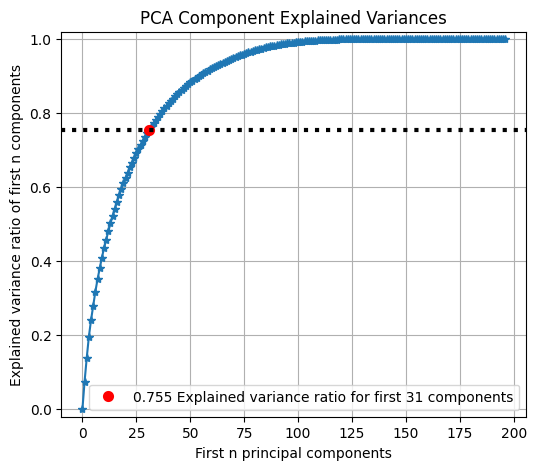

In [36]:
model = r
for c in range(0,25,5):
    print(f"PCA component #{c}: {sum(model['pca'].explained_variance_ratio_[0:c])*100:.0f}%")
plot_pca_component_variance(name=f"comp{c}", pca=model['pca'], save=False)

In [37]:
kmeans_kwargs = {"init": "random",
                 "n_init": 10,
                 "max_iter": 300,
                 "random_state": seed}

def plot_cluster_elbow(name, Y, save=False, figsize=(6,5)):
    skplt.cluster.plot_elbow_curve(KMeans(**kmeans_kwargs),
                               pd.DataFrame(data=Y),
                               cluster_ranges=range(1, 21, 1),
                               figsize=figsize)
    if save:
        plt.savefig(os.path.join(dir_fig, f"{name}_elbow.png"))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf60b1700>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf60b1310>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf62300d0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf6088d30>
Traceback 

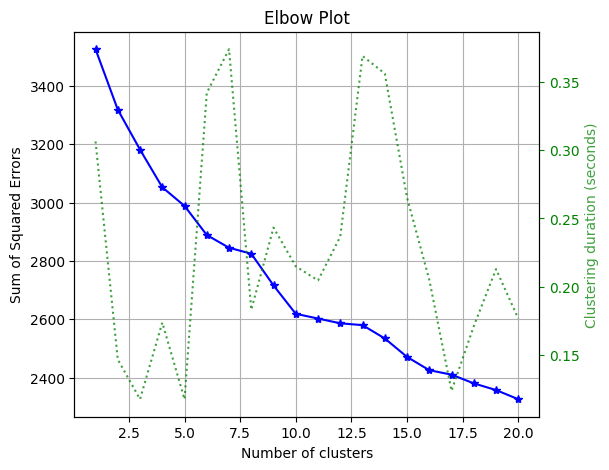

In [38]:
plot_cluster_elbow(name=f"comp{c}", Y=r['Y'], save=False)

In [39]:
# Y: each array represents a sequence, with each array value corresponding to a PCA component
# Y_df: dataframe where rows correspond to each sequence, and columns correspond to the PCA components
n_clusters = 6
Y_df = pd.DataFrame(data=r['Y'])

kmeans = KMeans(n_clusters=n_clusters, **kmeans_kwargs)
kmeans.fit(Y_df)

labels = [str(c) for c in kmeans.predict(Y_df)] # length of threads dataframe
centroids = kmeans.cluster_centers_ # n_components

dfagg_per_thread['kmeans_cluster'] = labels # add the kmeans cluster label for each thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fab004b9820>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fab004b9820>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faaf60b14c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fab004b9820>
Traceback 

In [40]:
dfagg_per_thread

,id,comment_pro_klimaat,sequence,kmeans_cluster
0,1,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1
1,2,"[Nee, Ja, Nee, Ja, Ja]","[P, W, W, W, W]",3
2,3,"[Nee, Nee, Nee, Nee, Nee, Nee, Nee, Nee]","[q, y, P, y, y, y, y, y]",2
3,4,"[Ja, Ja, Ja, Ja, Ja, Ja, Ja]","[Q, W, Q, W, Q, W, W]",5
4,5,"[Nee, Ja, Ja, Nee, Ja, Nee]","[X, P, W, P, P, P]",1
...,...,...,...,...
344,589,"[Nee, Ja, Nee, Ja, Ja]","[I, P, W, P, I]",1
345,591,"[Nee, Ja, Ja, Nee, Ja, Neutraal, Ja]","[x, W, Q, W, W, W, W]",5
346,592,"[Nee, Ja, Nee, Neutraal, Nee, Neutraal]","[y, Y, y, y, r, y]",4
347,594,"[Ja, Nee, Ja, Ja, Ja]","[q, W, W, W, W]",3


In [41]:
# merge in tweet texts
dfagg_mettext = dfagg_per_thread.merge(tweets.rename({'tweet_id':'id'}, axis=1), on=['id'], how='left')
dfagg_mettext

,id,comment_pro_klimaat,sequence,kmeans_cluster,comment_nr,text
0,1,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1,0.0,Op basis van #CBS onderzoek blijkt dar 96 % va...
1,1,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1,1.0,@USER @USER @USER @USER Ja het wordt steeds ko...
2,1,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1,2.0,@USER @USER @USER @USER Omdat het steeds warme...
3,1,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1,3.0,@USER @USER @USER @USER Nou ik kan me niet her...
4,1,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1,4.0,@USER @USER @USER @USER Ik zou het huis maar e...
...,...,...,...,...,...,...
1675,595,"[Nee, Neutraal, Nee, Nee, Nee]","[X, p, y, y, y]",4,1.0,@USER https://t.co/wsq6qzESjV
1676,595,"[Nee, Neutraal, Nee, Nee, Nee]","[X, p, y, y, y]",4,2.0,@USER 🙄
1677,595,"[Nee, Neutraal, Nee, Nee, Nee]","[X, p, y, y, y]",4,3.0,@USER Triest hè. Maar goed een ouwe witte man.
1678,595,"[Nee, Neutraal, Nee, Nee, Nee]","[X, p, y, y, y]",4,4.0,@USER Supertriest. En ik ben te dom om dat te ...


In [42]:
dfagg_mettext[dfagg_mettext['kmeans_cluster']=='1'].to_excel('TEST.xlsx')

In [43]:
dfagg_per_thread.kmeans_cluster.value_counts()

kmeans_cluster
4    154
3     69
1     54
0     32
5     31
2      9
Name: count, dtype: int64

In [44]:
dfagg_per_thread

,id,comment_pro_klimaat,sequence,kmeans_cluster
0,1,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1
1,2,"[Nee, Ja, Nee, Ja, Ja]","[P, W, W, W, W]",3
2,3,"[Nee, Nee, Nee, Nee, Nee, Nee, Nee, Nee]","[q, y, P, y, y, y, y, y]",2
3,4,"[Ja, Ja, Ja, Ja, Ja, Ja, Ja]","[Q, W, Q, W, Q, W, W]",5
4,5,"[Nee, Ja, Ja, Nee, Ja, Nee]","[X, P, W, P, P, P]",1
...,...,...,...,...
344,589,"[Nee, Ja, Nee, Ja, Ja]","[I, P, W, P, I]",1
345,591,"[Nee, Ja, Ja, Nee, Ja, Neutraal, Ja]","[x, W, Q, W, W, W, W]",5
346,592,"[Nee, Ja, Nee, Neutraal, Nee, Neutraal]","[y, Y, y, y, r, y]",4
347,594,"[Ja, Nee, Ja, Ja, Ja]","[q, W, W, W, W]",3


In [45]:
combined = dfagg.merge(dfagg_per_thread.rename({'id':'tweet_id'}, axis=1), on='tweet_id', suffixes=('','_thread'))
combined

,tweet_id,comment_nr,coder,comment_pro_klimaat,comment_inhoudelijk_argument,comment_persoonlijke_aanval,comment_over_communicatie,comment_respectvol,text,sequence,comment_pro_klimaat_thread,sequence_thread,kmeans_cluster
0,1,1,1252.083333,Neutraal,False,False,True,True,@USER @USER @USER @USER Ja het wordt steeds ko...,P,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1
1,1,2,1252.083333,Ja,True,False,True,True,@USER @USER @USER @USER Omdat het steeds warme...,W,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1
2,1,3,1252.083333,Nee,False,False,True,True,@USER @USER @USER @USER Nou ik kan me niet her...,P,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1
3,1,4,1252.083333,Ja,True,True,True,True,@USER @USER @USER @USER Ik zou het huis maar e...,Q,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1
4,1,5,1252.083333,Nee,False,True,True,False,@USER @USER @USER @USER Ja jij zat vast op Ibiza.,y,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,595,1,1161.380952,Nee,False,False,False,True,@USER https://t.co/wsq6qzESjV,X,"[Nee, Neutraal, Nee, Nee, Nee]","[X, p, y, y, y]",4
2000,595,2,1161.380952,Neutraal,False,False,True,False,@USER 🙄,p,"[Nee, Neutraal, Nee, Nee, Nee]","[X, p, y, y, y]",4
2001,595,3,1161.380952,Nee,False,True,True,False,@USER Triest hè. Maar goed een ouwe witte man.,y,"[Nee, Neutraal, Nee, Nee, Nee]","[X, p, y, y, y]",4
2002,595,4,1161.380952,Nee,False,True,True,False,@USER Supertriest. En ik ben te dom om dat te ...,y,"[Nee, Neutraal, Nee, Nee, Nee]","[X, p, y, y, y]",4


In [46]:
combined.groupby('comment_pro_klimaat')['kmeans_cluster'].value_counts()

comment_pro_klimaat  kmeans_cluster
Ja                   4                 223
                     3                 198
                     1                 142
                     0                 113
                     5                 106
                     2                  14
Nee                  4                 481
                     1                 117
                     3                 109
                     0                  45
                     2                  43
                     5                  39
Neutraal             4                 170
                     3                  70
                     1                  56
                     0                  36
                     5                  36
                     2                   6
Name: count, dtype: int64

<AxesSubplot:xlabel='comment_pro_klimaat', ylabel='count'>

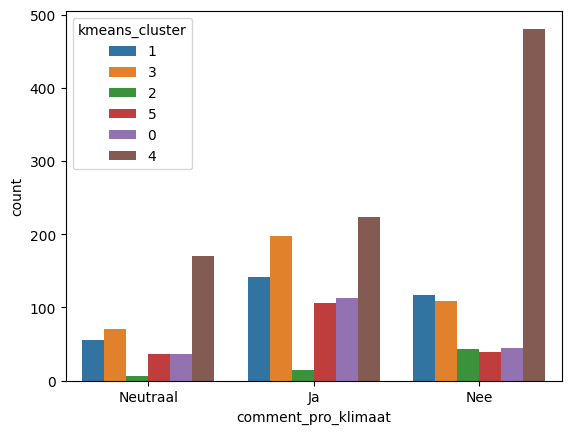

In [47]:
sns.countplot(x='comment_pro_klimaat', hue='kmeans_cluster', data=combined)

<AxesSubplot:xlabel='sequence', ylabel='count'>

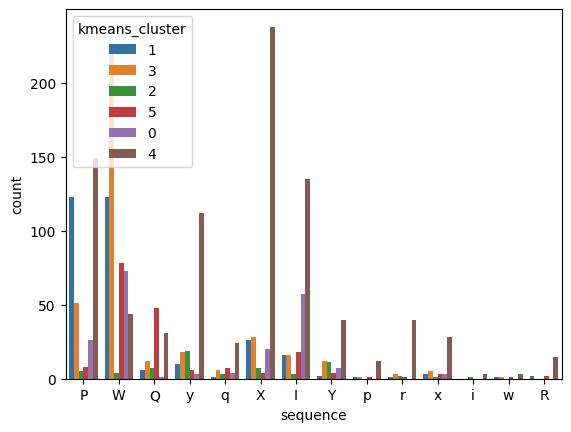

In [48]:
sns.countplot(x='sequence', hue='kmeans_cluster', data=combined)

In [49]:
combined

,tweet_id,comment_nr,coder,comment_pro_klimaat,comment_inhoudelijk_argument,comment_persoonlijke_aanval,comment_over_communicatie,comment_respectvol,text,sequence,comment_pro_klimaat_thread,sequence_thread,kmeans_cluster
0,1,1,1252.083333,Neutraal,False,False,True,True,@USER @USER @USER @USER Ja het wordt steeds ko...,P,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1
1,1,2,1252.083333,Ja,True,False,True,True,@USER @USER @USER @USER Omdat het steeds warme...,W,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1
2,1,3,1252.083333,Nee,False,False,True,True,@USER @USER @USER @USER Nou ik kan me niet her...,P,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1
3,1,4,1252.083333,Ja,True,True,True,True,@USER @USER @USER @USER Ik zou het huis maar e...,Q,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1
4,1,5,1252.083333,Nee,False,True,True,False,@USER @USER @USER @USER Ja jij zat vast op Ibiza.,y,"[Neutraal, Ja, Nee, Ja, Nee]","[P, W, P, Q, y]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,595,1,1161.380952,Nee,False,False,False,True,@USER https://t.co/wsq6qzESjV,X,"[Nee, Neutraal, Nee, Nee, Nee]","[X, p, y, y, y]",4
2000,595,2,1161.380952,Neutraal,False,False,True,False,@USER 🙄,p,"[Nee, Neutraal, Nee, Nee, Nee]","[X, p, y, y, y]",4
2001,595,3,1161.380952,Nee,False,True,True,False,@USER Triest hè. Maar goed een ouwe witte man.,y,"[Nee, Neutraal, Nee, Nee, Nee]","[X, p, y, y, y]",4
2002,595,4,1161.380952,Nee,False,True,True,False,@USER Supertriest. En ik ben te dom om dat te ...,y,"[Nee, Neutraal, Nee, Nee, Nee]","[X, p, y, y, y]",4


# Create discussion-level varbiables


In [50]:
# is het hele gesprek alleen inhoudelijk en geen persoonlijke aanval?
gespreksniveau = pd.DataFrame(dfagg.groupby('tweet_id')['comment_inhoudelijk_argument'].min())
gespreksniveau.columns = ['helegesprekinhoudelijk']
gespreksniveau['helegesprekgeenpersoonlijkeaanval'] = dfagg.groupby('tweet_id')['comment_persoonlijke_aanval'].min()
gespreksniveau['issueframedgeprek'] = gespreksniveau['helegesprekgeenpersoonlijkeaanval'] * gespreksniveau['helegesprekinhoudelijk']
gespreksniveau['issueframedgeprek'] = gespreksniveau['issueframedgeprek'].map(bool)
gespreksniveau['helegesprekminimaaleendisrespect'] = dfagg.groupby('tweet_id')['comment_respectvol'].max()
gespreksniveau = gespreksniveau.reset_index()

gespreksniveau

,tweet_id,helegesprekinhoudelijk,helegesprekgeenpersoonlijkeaanval,issueframedgeprek,helegesprekminimaaleendisrespect
0,1,False,False,False,True
1,2,False,False,False,True
2,3,False,False,False,True
3,4,True,False,False,True
4,5,False,False,False,True
...,...,...,...,...,...
344,589,False,False,False,True
345,591,False,False,False,True
346,592,False,True,False,True
347,594,True,False,False,True


In [51]:
# How many discussions relevant to our hypotheses are there at all?
print("Percentages:\n")
print(gespreksniveau.drop('tweet_id', axis=1).applymap(int).mean())
print('\n\n')
print("Absolute numbers:\n")
print(gespreksniveau.drop('tweet_id', axis=1).applymap(int).sum())

Percentages:

helegesprekinhoudelijk               0.094556
helegesprekgeenpersoonlijkeaanval    0.025788
issueframedgeprek                    0.000000
helegesprekminimaaleendisrespect     0.985673
dtype: float64



Absolute numbers:

helegesprekinhoudelijk                33
helegesprekgeenpersoonlijkeaanval      9
issueframedgeprek                      0
helegesprekminimaaleendisrespect     344
dtype: int64


In [52]:
gespr

NameError: name 'gespr' is not defined

In [ ]:
# SCRATCH BELOW

# H1 
H1: Interactions that include solely issue framing, polarize significantly less than interactions in which negative identity labels and/or process framing are present.

# TODO
waarschijnlijk is process framing verkeerd gecodeerd - zou bijna ooit Eens moeten zijn

In [ ]:
gespreksniveau.issueframedgeprek.value_counts()

In [ ]:
gespreksniveau.helegesprekgeenpersoonlijkeaanval.value_counts()

In [ ]:
gespreksniveau.helegesprekinhoudelijk.value_counts()

In [ ]:
gespreksniveau.helegesprekminimaaleendisrespect.value_counts()

In [ ]:
#issue_frame_interacties = dfagg.query("comment_inhoudelijk_argument=='Inhoudelijk argument' & comment_persoonlijke_aanval=='Geen persoonlijke aanval'" )
#issue_frame_interacties

In [ ]:
def gesprek_is_issue_only(series):
    return series.('Inhoudelijk argument')

In [ ]:
dfagg

In [ ]:
)

In [ ]:
inhoudelijkegesprekken = pd.DataFrame(test.groupby('tweet_id')['comment_inhoudelijk_argument_bool'].min())
# nee klopt niet, moet ook geen persoonlijke aanval
inhoudelijkegesprekken.columns=['inhoudelijkgesprek']
inhoudelijkegesprekken = inhoudelijkegesprekken.reset_index()

In [ ]:
test2 = test.merge(inhoudelijkegesprekken, on = 'tweet_id')
test2

In [ ]:
test2.inhoudelijkgesprek.value_counts()

In [ ]:
pd.crosstab(test2.inhoudelijkgesprek, test2.comment_respectvol)

In [ ]:
issue_frame_interacties.comment_respectvol.value_counts(normalize=True)

In [ ]:
rest = dfagg[~dfagg.index.isin(issue_frame_interacties.index)]
rest.comment_respectvol.value_counts(normalize=True)

In [ ]:
# nog heel veel te doen, mitsen maren ....
# maar: het is wel zou dat inhoudelijk + niet persoonlijk lijdt tot VEEL minder respectloze comments

# H2: Interactions that include negative identity labels, polarize significantly more often than interactions where these labels are not present.

In [ ]:
dfagg.groupby("comment_persoonlijke_aanval")['comment_respectvol']
